In [42]:
import numpy as np
import pandas as pd

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 12)
pd.set_option('display.max_colwidth', 200)

In [44]:
inputfile = "../data/TactSim-Draft1.csv"
inputfile = "../data/TactSim-Draft2.pkl"

In [45]:
sim_df = pd.read_pickle(inputfile)
print(sim_df.shape)
sim_df[:3]

(12499, 7)


,FiringRate,Spikes,Frequency,depth,Afferent_Class,duration,Pin_Radius
0,[95.30292716133424],"[0.001, 0.0098, 0.02, 0.0304, 0.040799999999999996, 0.0514, 0.0618, 0.0724, 0.08280000000000001, 0.09340000000000001, 0.10400000000000001, 0.1144, 0.125, 0.1354, 0.14600000000000002, 0.15660000000...",95,1.60,PC,1.763,1.07
1,[130.586186883343],"[0.001, 0.0063999999999999994, 0.013000000000000001, 0.0206, 0.027999999999999997, 0.0358, 0.043199999999999995, 0.051, 0.0584, 0.0664, 0.0738, 0.08180000000000001, 0.0892, 0.09720000000000001, 0....",65,0.58,PC,1.034,1.39
2,[0.7628928898382668],[0.0494],95,2.04,RA,1.311,1.38


# Notes

- 21.5k Samples & 7 Columns
- Columns
  - Predictors
      - FiringRate
      - Spikes
      - Afferent_Class
  - Target
      - Frequency

## check data: FiringRate

- Contains list with only one value

In [46]:
check_list_lengths(sim_df["FiringRate"])

1    12499
Name: FiringRate, dtype: int64

In [47]:
sim_df["FiringRate_value"] = sim_df["FiringRate"].apply(lambda x: round(x[0], 4)).astype("float16")

## check data: Spikes

| num of items | num of samples |
| -- | -- |
| 0 |   10914 | 
| 1 |     314 | 
| 2 |      165 | 
| 3 |       102 | 
| 4 |        78 | 
Sum = 11573

In [48]:
# sim_df["Spikes"].apply(lambda x: len(x)).value_counts()[:30] # len of string

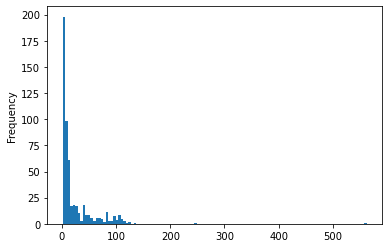

In [49]:
sim_df["Spikes_n_items"] = sim_df["Spikes"].apply(lambda x: len(x))

sim_df["Spikes"].apply(lambda x: len(x)).value_counts()[:].plot(kind="hist", bins=120);

## check data: Afferent_Class

In [50]:
sim_df["Afferent_Class"].value_counts()

PC     6831
RA     5431
SA1     237
Name: Afferent_Class, dtype: int64

In [51]:
sim_df.groupby("Afferent_Class")["Spikes_n_items"].apply(lambda x: x.value_counts()[:5])

Afferent_Class    
PC              1     223
                2      64
                56     62
                39     62
                49     62
RA              1     258
                2     145
                3      90
                36     78
                6      77
SA1             1      82
                2      36
                5      20
                3      20
                6      17
Name: Spikes_n_items, dtype: int64

## check data: Frequency

In [52]:
sim_df.groupby("Afferent_Class")["Frequency"].value_counts().sort_index()

Afferent_Class  Frequency
PC              5            241
                15           449
                25           587
                35           737
                45           693
                55           792
                65           810
                75           803
                85           881
                95           838
RA              5            170
                15           336
                25           485
                35           526
                45           606
                55           606
                65           664
                75           685
                85           683
                95           670
SA1             5              3
                15             3
                25             5
                35            16
                45            15
                55            32
                65            43
                75            37
                85            44
                9

In [53]:
sim_df.groupby(["Afferent_Class","Frequency"])["Spikes_n_items"].value_counts().sort_index()

Afferent_Class  Frequency  Spikes_n_items
PC              5          0                   1
                           1                 138
                           2                  29
                           4                   3
                           5                   3
                           6                   4
                           7                  12
                           8                  13
                           9                  14
                           10                 14
                           11                  7
                           14                  1
                           15                  1
                           18                  1
                15         0                   3
                           1                  42
                           2                  11
                           3                   7
                           4                   3
                           

# Utilities

In [18]:
def eval_w(x):
    try:
        return eval(x)
    except Exception as e:
        print(x, e)
        return []

def check_list_lengths(series):
    return series.apply(lambda x: len(x)).value_counts()
        
def np_from_str(string):
    string = string.replace("[]","").replace("]","").replace("[","").replace(".","")
    float_list = [float(i.strip()) for i in string.split()]
    return float_list